In [1]:
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), 'Data-Analysis-Project'))
	print(os.getcwd())
except:
	pass


In [2]:
#import libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import numpy.random as nr
import math


In [3]:
# load datasets
Malaria = pd.read_csv('./NG_2015_MIS_07012019_1354_135943/nmis.csv')


In [4]:
Malaria.head(20)


,hhid,hv024,hv025,hv201,hv205,hv206,hv213,hv214,hv215,hv210,hv211,hv212,hv227,hv244,hv247,hv270,sh16_22,shstate
0,1002,north west,urban,protected well,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,no,no,no,yes,yes,no,richer,NaN,sokoto
1,1004,north west,urban,tanker truck,ventilated improved pit latrine (vip),yes,"palm, bamboo",cement,zinc/metal,yes,no,yes,yes,yes,yes,richer,NaN,sokoto
2,1007,north west,urban,tube well or borehole,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,no,yes,no,yes,no,no,richer,NaN,sokoto
3,1010,north west,urban,tube well or borehole,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,yes,yes,yes,yes,no,no,richest,NaN,sokoto
4,1013,north west,urban,tanker truck,ventilated improved pit latrine (vip),yes,ceramic tiles,cement,zinc/metal,no,yes,yes,yes,no,yes,richest,NaN,sokoto
5,1016,north west,urban,tube well or borehole,ventilated improved pit latrine (vip),yes,wood planks,cardboard,zinc/metal,no,yes,no,yes,yes,yes,richer,NaN,sokoto
6,1019,north west,urban,tube well or borehole,ventilated improved pit latrine (vip),yes,cement,plywood,zinc/metal,no,no,yes,yes,no,yes,richest,NaN,sokoto
7,1022,north west,urban,tanker truck,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,no,yes,no,yes,no,yes,richest,NaN,sokoto
8,1025,north west,urban,tanker truck,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,no,yes,no,yes,no,yes,richest,NaN,sokoto
9,1027,north west,urban,tube well or borehole,pit latrine with slab,yes,cement,cement,zinc/metal,no,no,no,no,no,no,richer,NaN,sokoto


In [5]:
# assign human-readable names to column/variable names in the dataset


In [6]:
Malaria.columns=['Case Identification', 'Region', 'Type of Place of Residence', 'Source of Drinking Water', 'Type of Toilet Facility',
                'Has Electricity', 'Main Floor Material', 'Main Wall Material', 'Main Roof Material', 'Has Bicycle', 'Has Motorcycle/Scooter',
                'Has Car/Truck', 'Has Mosquito Bed Net for Sleeping', 'Owns Land Suitable for Agriculture', 'Has Bank Account', 
                'Wealth Index', 'Cost of Treatment for Fever', 'State']

print(Malaria.shape)


(7745, 18)


In [7]:
Malaria.head()


,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Type of Toilet Facility,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has Motorcycle/Scooter,Has Car/Truck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index,Cost of Treatment for Fever,State
0,1002,north west,urban,protected well,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,no,no,no,yes,yes,no,richer,NaN,sokoto
1,1004,north west,urban,tanker truck,ventilated improved pit latrine (vip),yes,"palm, bamboo",cement,zinc/metal,yes,no,yes,yes,yes,yes,richer,NaN,sokoto
2,1007,north west,urban,tube well or borehole,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,no,yes,no,yes,no,no,richer,NaN,sokoto
3,1010,north west,urban,tube well or borehole,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,yes,yes,yes,yes,no,no,richest,NaN,sokoto
4,1013,north west,urban,tanker truck,ventilated improved pit latrine (vip),yes,ceramic tiles,cement,zinc/metal,no,yes,yes,yes,no,yes,richest,NaN,sokoto


In [8]:
# Some of the column/variable names contain wild/special chars
Malaria.columns=[str.replace('/','or') for str in Malaria.columns]


In [9]:
Malaria.head()


,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Type of Toilet Facility,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has MotorcycleorScooter,Has CarorTruck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index,Cost of Treatment for Fever,State
0,1002,north west,urban,protected well,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,no,no,no,yes,yes,no,richer,NaN,sokoto
1,1004,north west,urban,tanker truck,ventilated improved pit latrine (vip),yes,"palm, bamboo",cement,zinc/metal,yes,no,yes,yes,yes,yes,richer,NaN,sokoto
2,1007,north west,urban,tube well or borehole,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,no,yes,no,yes,no,no,richer,NaN,sokoto
3,1010,north west,urban,tube well or borehole,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,yes,yes,yes,yes,no,no,richest,NaN,sokoto
4,1013,north west,urban,tanker truck,ventilated improved pit latrine (vip),yes,ceramic tiles,cement,zinc/metal,no,yes,yes,yes,no,yes,richest,NaN,sokoto


In [10]:
Malaria.dtypes

# We are going to check which of our variables have missing values


Case Identification                     int64
Region                                 object
Type of Place of Residence             object
Source of Drinking Water               object
Type of Toilet Facility                object
Has Electricity                        object
Main Floor Material                    object
Main Wall Material                     object
Main Roof Material                     object
Has Bicycle                            object
Has MotorcycleorScooter                object
Has CarorTruck                         object
Has Mosquito Bed Net for Sleeping      object
Owns Land Suitable for Agriculture     object
Has Bank Account                       object
Wealth Index                           object
Cost of Treatment for Fever           float64
State                                  object
dtype: object

In [11]:
# check for missing values
Malaria.isnull().sum(axis=0) 


Case Identification                      0
Region                                   0
Type of Place of Residence               0
Source of Drinking Water                 0
Type of Toilet Facility                  1
Has Electricity                          0
Main Floor Material                      0
Main Wall Material                       0
Main Roof Material                       0
Has Bicycle                              0
Has MotorcycleorScooter                  0
Has CarorTruck                           0
Has Mosquito Bed Net for Sleeping        0
Owns Land Suitable for Agriculture       0
Has Bank Account                         0
Wealth Index                             0
Cost of Treatment for Fever           7742
State                                    0
dtype: int64

  'Type of Toilet Facility' and 'Cost of Treatment for Fever' contains missing values. We are going to remove both columns from our dataset.

In [12]:
Malaria.drop(['Cost of Treatment for Fever','Type of Toilet Facility'], axis=1, inplace=True)



In [13]:
Malaria.head()


,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has MotorcycleorScooter,Has CarorTruck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index,State
0,1002,north west,urban,protected well,yes,cement,cement,zinc/metal,no,no,no,yes,yes,no,richer,sokoto
1,1004,north west,urban,tanker truck,yes,"palm, bamboo",cement,zinc/metal,yes,no,yes,yes,yes,yes,richer,sokoto
2,1007,north west,urban,tube well or borehole,yes,cement,cement,zinc/metal,no,yes,no,yes,no,no,richer,sokoto
3,1010,north west,urban,tube well or borehole,yes,cement,cement,zinc/metal,yes,yes,yes,yes,no,no,richest,sokoto
4,1013,north west,urban,tanker truck,yes,ceramic tiles,cement,zinc/metal,no,yes,yes,yes,no,yes,richest,sokoto


In [14]:
#put our table in form of pandas dataframe for analysis
df = pd.DataFrame(Malaria)


In [15]:
#Descriptive statistics/analysis


In [16]:
df['State'].value_counts()



lagos            225
adamawa          225
taraba           225
cross river      225
abia             225
yobe             225
gombe            225
jigawa           225
bayelsa          225
bauchi           225
oyo              224
sokoto           224
kebbi            223
ondo             223
osun             221
akwa ibom        220
katsina          220
ogun             220
zamfara          220
rivers           220
kaduna           219
ekiti            217
enugu            217
kano             216
edo              211
kogi             211
benue            211
niger            206
ebonyi           201
nasarawa         200
plateau          196
kwara            194
imo              191
delta            180
anambra          168
fct abuja        167
borno - urban     75
Name: State, dtype: int64

In [17]:
df['Has Electricity'].value_counts()



yes    4247
no     3498
Name: Has Electricity, dtype: int64

In [18]:
df['Source of Drinking Water'].value_counts()



tube well or borehole                                   2795
river/dam/lake/ponds/stream/canal/irrigation channel     829
unprotected well                                         819
protected well                                           786
sachet water                                             786
public tap/standpipe                                     393
unprotected spring                                       349
rainwater                                                308
piped into dwelling                                      238
piped to yard/plot                                       101
protected spring                                          87
piped to neighbor                                         84
tanker truck                                              71
bottled water                                             68
cart with small tank                                      27
other                                                      4
Name: Source of Drinking

In [19]:
df['Wealth Index'].value_counts()



richer     1844
richest    1816
middle     1676
poorer     1351
poorest    1058
Name: Wealth Index, dtype: int64

In [20]:
df['Has Mosquito Bed Net for Sleeping'].value_counts()



yes    5432
no     2313
Name: Has Mosquito Bed Net for Sleeping, dtype: int64

In [21]:
df.groupby('Wealth Index')['State'].describe()


,count,unique,top,freq
Wealth Index,,,,
middle,1676,37,nasarawa,89
poorer,1351,35,taraba,97
poorest,1058,25,sokoto,108
richer,1844,37,ekiti,107
richest,1816,36,lagos,207


 From the table above, Lagos State has the top number of richest people and Sokoto State has the top number of poorest people.

In [22]:
df.groupby('Has Mosquito Bed Net for Sleeping')['State'].describe()

,count,unique,top,freq
Has Mosquito Bed Net for Sleeping,,,,
no,2313,37,edo,124
yes,5432,37,bauchi,221


 From above table Bauchi State has the Highest number of people with Mosquito Bed Net for Sleeping, While Edo State has the least Number.

In [23]:
df.groupby('Has Electricity')['State'].describe()


,count,unique,top,freq
Has Electricity,,,,
no,3498,37,adamawa,189
yes,4247,37,lagos,224


 From above table Lagos State has the Highest number of people with access to Electricity, While Adamawa State has the least Number.

In [24]:
df['Source of Drinking Water'].value_counts()


tube well or borehole                                   2795
river/dam/lake/ponds/stream/canal/irrigation channel     829
unprotected well                                         819
protected well                                           786
sachet water                                             786
public tap/standpipe                                     393
unprotected spring                                       349
rainwater                                                308
piped into dwelling                                      238
piped to yard/plot                                       101
protected spring                                          87
piped to neighbor                                         84
tanker truck                                              71
bottled water                                             68
cart with small tank                                      27
other                                                      4
Name: Source of Drinking

 From the table above, most people source of drinking water is Tube Well or Borehole.

In [25]:
#APPLICATION OF MACHINE LEARNING MODELS


In [26]:
Malaria.head()


,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has MotorcycleorScooter,Has CarorTruck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index,State
0,1002,north west,urban,protected well,yes,cement,cement,zinc/metal,no,no,no,yes,yes,no,richer,sokoto
1,1004,north west,urban,tanker truck,yes,"palm, bamboo",cement,zinc/metal,yes,no,yes,yes,yes,yes,richer,sokoto
2,1007,north west,urban,tube well or borehole,yes,cement,cement,zinc/metal,no,yes,no,yes,no,no,richer,sokoto
3,1010,north west,urban,tube well or borehole,yes,cement,cement,zinc/metal,yes,yes,yes,yes,no,no,richest,sokoto
4,1013,north west,urban,tanker truck,yes,ceramic tiles,cement,zinc/metal,no,yes,yes,yes,no,yes,richest,sokoto


In [27]:
Malaria_ML = pd.read_csv("./NG_2015_MIS_07012019_1354_135943/numeric_nmis.csv")


In [28]:
Malaria_ML.head()


,hhid,hv024,hv025,hv201,hv205,hv206,hv213,hv214,hv215,hv210,hv211,hv212,hv227,hv244,hv247,hv270,sh16_22,shstate
0,1002,3,1,31,21.0,1,34,31,31,0,0,0,1,1,0,4,NaN,10
1,1004,3,1,61,21.0,1,22,31,31,1,0,1,1,1,1,4,NaN,10
2,1007,3,1,21,21.0,1,34,31,31,0,1,0,1,0,0,4,NaN,10
3,1010,3,1,21,21.0,1,34,31,31,1,1,1,1,0,0,5,NaN,10
4,1013,3,1,61,21.0,1,33,31,31,0,1,1,1,0,1,5,NaN,10


In [29]:
Malaria_ML.columns=['Case Identification', 'Region', 'Type of Place of Residence', 'Source of Drinking Water', 'Type of Toilet Facility',
                'Has Electricity', 'Main Floor Material', 'Main Wall Material', 'Main Roof Material', 'Has Bicycle', 'Has Motorcycle/Scooter',
                'Has Car/Truck', 'Has Mosquito Bed Net for Sleeping', 'Owns Land Suitable for Agriculture', 'Has Bank Account', 
                'Wealth Index', 'Cost of Treatment for Fever', 'State']

print(Malaria_ML.shape)
Malaria_ML.head()


(7745, 18)


,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Type of Toilet Facility,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has Motorcycle/Scooter,Has Car/Truck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index,Cost of Treatment for Fever,State
0,1002,3,1,31,21.0,1,34,31,31,0,0,0,1,1,0,4,NaN,10
1,1004,3,1,61,21.0,1,22,31,31,1,0,1,1,1,1,4,NaN,10
2,1007,3,1,21,21.0,1,34,31,31,0,1,0,1,0,0,4,NaN,10
3,1010,3,1,21,21.0,1,34,31,31,1,1,1,1,0,0,5,NaN,10
4,1013,3,1,61,21.0,1,33,31,31,0,1,1,1,0,1,5,NaN,10


In [30]:
Malaria_ML.columns=[str.replace('/','or') for str in Malaria_ML.columns]



In [31]:
Malaria_ML.isnull().sum(axis=0) 


Case Identification                      0
Region                                   0
Type of Place of Residence               0
Source of Drinking Water                 0
Type of Toilet Facility                  1
Has Electricity                          0
Main Floor Material                      0
Main Wall Material                       0
Main Roof Material                       0
Has Bicycle                              0
Has MotorcycleorScooter                  0
Has CarorTruck                           0
Has Mosquito Bed Net for Sleeping        0
Owns Land Suitable for Agriculture       0
Has Bank Account                         0
Wealth Index                             0
Cost of Treatment for Fever           7742
State                                    0
dtype: int64

In [32]:
Malaria_ML.drop(['Cost of Treatment for Fever','Type of Toilet Facility'], axis=1, inplace=True)


In [33]:
Malaria_ML.head()


,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has MotorcycleorScooter,Has CarorTruck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index,State
0,1002,3,1,31,1,34,31,31,0,0,0,1,1,0,4,10
1,1004,3,1,61,1,22,31,31,1,0,1,1,1,1,4,10
2,1007,3,1,21,1,34,31,31,0,1,0,1,0,0,4,10
3,1010,3,1,21,1,34,31,31,1,1,1,1,0,0,5,10
4,1013,3,1,61,1,33,31,31,0,1,1,1,0,1,5,10


In [34]:
Malaria_ML.tail()


,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has MotorcycleorScooter,Has CarorTruck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index,State
7740,333108,6,2,21,1,34,31,36,0,0,0,1,0,1,5,370
7741,333113,6,2,72,1,34,31,36,0,0,0,1,0,1,5,370
7742,333119,6,2,72,1,33,31,36,0,0,0,0,0,1,5,370
7743,333124,6,2,21,1,34,31,36,0,1,0,1,1,1,5,370
7744,333129,6,2,72,1,35,31,36,0,0,1,1,0,1,5,370


In [35]:
def plot_corr(Malaria_ML, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        Malaria: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = Malaria_ML.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)
    # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)
    # draw y tick marks


In [36]:
# Correlated Feature Check. 
# Correlation by color. Red is most correlated with other variable, Yellow is self to self correlated and Blue is least correlated with other variable.


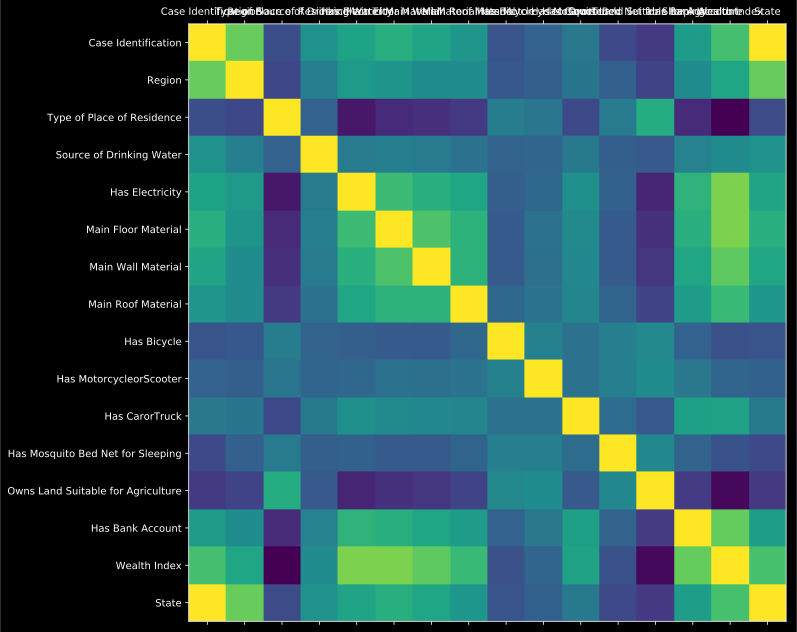

In [37]:
plot_corr(Malaria_ML)


In [38]:
# State and Case Identification appears to be correlated.
# Drop State Column

del Malaria_ML['State']


In [39]:
Malaria_ML.head(5)



,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has MotorcycleorScooter,Has CarorTruck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index
0,1002,3,1,31,1,34,31,31,0,0,0,1,1,0,4
1,1004,3,1,61,1,22,31,31,1,0,1,1,1,1,4
2,1007,3,1,21,1,34,31,31,0,1,0,1,0,0,4
3,1010,3,1,21,1,34,31,31,1,1,1,1,0,0,5
4,1013,3,1,61,1,33,31,31,0,1,1,1,0,1,5


In [40]:
Malaria_ML.corr()


,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has MotorcycleorScooter,Has CarorTruck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index
Case Identification,1.000000,0.638409,-0.177266,0.242676,0.346377,0.418109,0.357156,0.258999,-0.146223,-0.065743,0.069666,-0.209099,-0.287561,0.308290,0.539692
Region,0.638409,1.000000,-0.216489,0.114729,0.289712,0.249819,0.204138,0.195965,-0.126653,-0.079921,0.050046,-0.076920,-0.239670,0.202319,0.362222
Type of Place of Residence,-0.177266,-0.216489,1.000000,-0.062668,-0.451181,-0.369315,-0.343694,-0.290769,0.105237,0.059444,-0.207979,0.081198,0.406885,-0.362743,-0.552373
Source of Drinking Water,0.242676,0.114729,-0.062668,1.000000,0.083321,0.114668,0.094403,0.032614,-0.056048,-0.046185,0.076336,-0.082932,-0.119719,0.133601,0.194949
Has Electricity,0.346377,0.289712,-0.451181,0.083321,1.000000,0.510600,0.433182,0.368053,-0.080331,-0.035021,0.227692,-0.068400,-0.394045,0.459657,0.695772
Main Floor Material,0.418109,0.249819,-0.369315,0.114668,0.510600,1.000000,0.564095,0.452509,-0.105225,0.032129,0.191956,-0.115477,-0.331080,0.426058,0.692384
Main Wall Material,0.357156,0.204138,-0.343694,0.094403,0.433182,0.564095,1.000000,0.453377,-0.110117,0.023289,0.174703,-0.111986,-0.308910,0.363704,0.614118
Main Roof Material,0.258999,0.195965,-0.290769,0.032614,0.368053,0.452509,0.453377,1.000000,-0.036135,0.041197,0.160614,-0.053217,-0.234329,0.297131,0.498227
Has Bicycle,-0.146223,-0.126653,0.105237,-0.056048,-0.080331,-0.105225,-0.110117,-0.036135,1.000000,0.132240,0.029424,0.116814,0.176735,-0.064909,-0.165187
Has MotorcycleorScooter,-0.065743,-0.079921,0.059444,-0.046185,-0.035021,0.032129,0.023289,0.041197,0.132240,1.000000,0.035229,0.118703,0.202835,0.065937,-0.046922


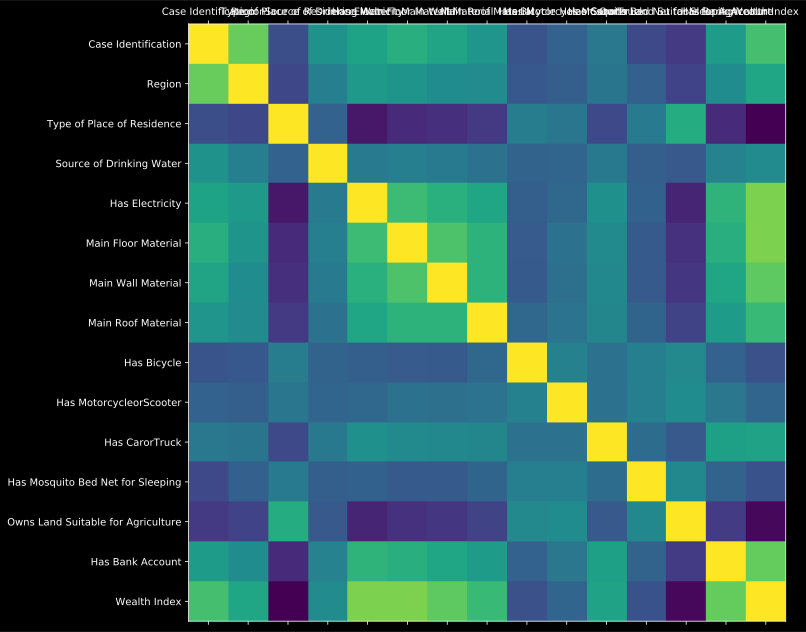

In [41]:
plot_corr(Malaria_ML)


In [42]:
# The correlations look good. There appear to be no coorelated columns.
# Next we want to check class distribution

In [43]:
num_obs = len(Malaria_ML)
num_true = len(Malaria_ML.loc[Malaria_ML['Has Mosquito Bed Net for Sleeping'] == 1])
num_false = len(Malaria_ML.loc[Malaria_ML['Has Mosquito Bed Net for Sleeping'] == 0])
print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))


Number of True cases: 5432 (70.14%)
Number of False cases: 2313 (29.86%)


 Our class distribution is fairly good.

 # Spliting the data
 70% for training, 30% for testing

In [44]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
feature_col_names = ['Region', 'Type of Place of Residence', 'Source of Drinking Water', 'Has Electricity', 'Wealth Index', 'Has Bicycle', 'Has MotorcycleorScooter', 'Has CarorTruck' , 'Owns Land Suitable for Agriculture', 'Has Bank Account' , 'Main Floor Material' ,'Main Wall Material' , 'Main Roof Material']
predicted_class_names = ['Has Mosquito Bed Net for Sleeping']

X = Malaria_ML[feature_col_names].values     # predictor feature columns (8 X m)
y = Malaria_ML[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
# test_size = 0.3 is 30%, 42 is the answer to everything


In [45]:
#Get an idea bout the rows and columns we have obtained
print("\nX_train:\n")
print(X_train.shape)

print("\nX_test:\n")
print(X_test.shape)


X_train:

(5421, 13)

X_test:

(2324, 13)


In [46]:
# check we have the the desired 70% train, 30% test split of the data.


In [47]:
print("{0:0.2f}% in training set".format((len(X_train)/len(Malaria_ML.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(Malaria_ML.index)) * 100))


69.99% in training set
30.01% in test set


In [48]:
# Verifying predicted value was split correctly.


In [49]:
print("Original True  : {0} ({1:0.2f}%)".format(len(Malaria_ML.loc[Malaria_ML['Has Mosquito Bed Net for Sleeping'] == 1]), (len(Malaria_ML.loc[Malaria_ML['Has Mosquito Bed Net for Sleeping'] == 1])/len(Malaria_ML.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(Malaria_ML.loc[Malaria_ML['Has Mosquito Bed Net for Sleeping'] == 0]), (len(Malaria_ML.loc[Malaria_ML['Has Mosquito Bed Net for Sleeping'] == 0])/len(Malaria_ML.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))


Original True  : 5432 (70.14%)
Original False : 2313 (29.86%)

Training True  : 3788 (69.88%)
Training False : 1633 (30.12%)

Test True      : 1644 (70.74%)
Test False     : 680 (29.26%)


In [50]:
# # Training Algorithm - Using Naive Bayes Machine Learning Model
# # Using Logistic Regression
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())


GaussianNB(priors=None, var_smoothing=1e-09)

 Performance on Training Data

In [51]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.0f}%".format(metrics.accuracy_score(y_train, nb_predict_train)*100))
print()


Accuracy: 63%



 Our accurancy rate is 63% on the training data. This is below the 70% benchmark for our ideal ML Model.

 Performance on Testing Data

In [52]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# training metrics
print("nb_predict_test", nb_predict_test)
print ("y_test", y_test)
print("Accuracy: {0:.0f}%".format(metrics.accuracy_score(y_test, nb_predict_test)*100))



nb_predict_test [1 0 1 ... 1 0 0]
y_test [[1]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]
Accuracy: 64%


In [53]:
#Accuracy on testing data is also below our 70% benchmark.



In [54]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))


Confusion Matrix
[[ 331  349]
 [ 496 1148]]

Classification Report
              precision    recall  f1-score   support

           0       0.40      0.49      0.44       680
           1       0.77      0.70      0.73      1644

   micro avg       0.64      0.64      0.64      2324
   macro avg       0.58      0.59      0.59      2324
weighted avg       0.66      0.64      0.65      2324



 Our Recall and Precision rate is 70% and 77% respectively. This is ok. However we would try other models if they would work better.

 # Using Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)      # Create random forest object
rf_model.fit(X_train, y_train.ravel()) 


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [56]:
# Predict Training Data


In [57]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.0f}%".format(metrics.accuracy_score(y_train, rf_predict_train)*100))


Accuracy: 89%


 Random Forest Accuracy level looks much better.

 Predict Test Data

In [58]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.0f}%".format(metrics.accuracy_score(y_test, rf_predict_test)*100))


Accuracy: 68%


 But this is slightly below 70% for our test data.

In [59]:
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))


[[ 276  404]
 [ 338 1306]]

Classification Report
              precision    recall  f1-score   support

           0       0.45      0.41      0.43       680
           1       0.76      0.79      0.78      1644

   micro avg       0.68      0.68      0.68      2324
   macro avg       0.61      0.60      0.60      2324
weighted avg       0.67      0.68      0.68      2324



 Our precision and Recall recorded good values based on true 'Yes' and 'No' for ownership of Mosquito Bed Net for Sleeping though the accuracy level on the test data is slightly less than our 70% benchmark.

 # Using Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

lr_model =LogisticRegression(C=0.7, random_state=42, solver='liblinear', max_iter=10000)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.0f}%".format(metrics.accuracy_score(y_test, lr_predict_test)*100))
print("Precision: {0:.0f}%".format(metrics.precision_score(y_test, lr_predict_test)*100))
print("Recall: {0:.0f}%".format(metrics.recall_score(y_test, lr_predict_test)*100))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))


Accuracy: 70%
Precision: 71%
Recall: 97%

Classification Report
              precision    recall  f1-score   support

           0       0.44      0.05      0.09       680
           1       0.71      0.97      0.82      1644

   micro avg       0.70      0.70      0.70      2324
   macro avg       0.58      0.51      0.46      2324
weighted avg       0.63      0.70      0.61      2324



 Logistic Regression Model performed best for our prediction. So we would finally go with the Logistics Regression Model.

 # Using our trained Model (Logistic Regression)

In [61]:
# Save trained model to file
from sklearn.externals import joblib  
joblib.dump(lr_model, "Malaria Model")


['Malaria Model']

In [62]:
#load trained model
lr_model = joblib.load('Malaria Model')


In [63]:
#Test prediction on data and once the model is loaded

Malaria_Predic = pd.read_csv("./NG_2015_MIS_07012019_1354_135943/numeric_mtd.csv")


In [64]:
Malaria_Predic.head()


,hhid,hv024,hv025,hv201,hv205,hv206,hv213,hv214,hv215,hv210,hv211,hv212,hv227,hv244,hv247,hv270,sh16_22,shstate
0,1002,3,1,31,21,1,34,31,31,0,0,0,1,1,0,4,NaN,10
1,1004,3,1,61,21,1,22,31,31,1,0,1,1,1,1,4,NaN,10
2,1007,3,1,21,21,1,34,31,31,0,1,0,1,0,0,4,NaN,10
3,1010,3,1,21,21,1,34,31,31,1,1,1,1,0,0,5,NaN,10
4,1013,3,1,61,21,1,33,31,31,0,1,1,1,0,1,5,NaN,10


In [65]:
#Test data contains a few rows


In [66]:
#We will do some cleaning as before
Malaria_Predic.columns=['Case Identification', 'Region', 'Type of Place of Residence', 'Source of Drinking Water', 'Type of Toilet Facility',
                'Has Electricity', 'Main Floor Material', 'Main Wall Material', 'Main Roof Material', 'Has Bicycle', 'Has Motorcycle/Scooter',
                'Has Car/Truck', 'Has Mosquito Bed Net for Sleeping', 'Owns Land Suitable for Agriculture', 'Has Bank Account', 
                'Wealth Index', 'Cost of Treatment for Fever', 'State']
print(Malaria_Predic.shape)
Malaria_Predic.head()


(5, 18)


,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Type of Toilet Facility,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has Motorcycle/Scooter,Has Car/Truck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index,Cost of Treatment for Fever,State
0,1002,3,1,31,21,1,34,31,31,0,0,0,1,1,0,4,NaN,10
1,1004,3,1,61,21,1,22,31,31,1,0,1,1,1,1,4,NaN,10
2,1007,3,1,21,21,1,34,31,31,0,1,0,1,0,0,4,NaN,10
3,1010,3,1,21,21,1,34,31,31,1,1,1,1,0,0,5,NaN,10
4,1013,3,1,61,21,1,33,31,31,0,1,1,1,0,1,5,NaN,10


In [67]:
Malaria_Predic.columns=[str.replace('/','or') for str in Malaria_Predic.columns]


In [68]:
Malaria_Predic.drop(['Type of Toilet Facility', 'Cost of Treatment for Fever', 'Case Identification', 'State'], axis=1, inplace=True)



In [69]:
Malaria_Predic.head()


,Region,Type of Place of Residence,Source of Drinking Water,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has MotorcycleorScooter,Has CarorTruck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index
0,3,1,31,1,34,31,31,0,0,0,1,1,0,4
1,3,1,61,1,22,31,31,1,0,1,1,1,1,4
2,3,1,21,1,34,31,31,0,1,0,1,0,0,4
3,3,1,21,1,34,31,31,1,1,1,1,0,0,5
4,3,1,61,1,33,31,31,0,1,1,1,0,1,5


In [70]:
#We need to drop 'Has Mosquito Bed Net for Sleeping" since that is what we are preicting
#Store data without the column with prefix X as we did with the X_train and X_test to indicate that it only contains the columns we are predicting


In [71]:
X_predic = Malaria_Predic
del X_predic['Has Mosquito Bed Net for Sleeping']


In [72]:
X_predic


,Region,Type of Place of Residence,Source of Drinking Water,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has MotorcycleorScooter,Has CarorTruck,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index
0,3,1,31,1,34,31,31,0,0,0,1,0,4
1,3,1,61,1,22,31,31,1,0,1,1,1,4
2,3,1,21,1,34,31,31,0,1,0,0,0,4
3,3,1,21,1,34,31,31,1,1,1,0,0,5
4,3,1,61,1,33,31,31,0,1,1,0,1,5


 At this point our data is ready to be used for prediction.

 Predict 'Has Mosquito Bed Net for Sleeping' with the prediction data. Returns 1 if True, 0 if false

In [73]:
Malaria_Predic.head()


,Region,Type of Place of Residence,Source of Drinking Water,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has MotorcycleorScooter,Has CarorTruck,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index
0,3,1,31,1,34,31,31,0,0,0,1,0,4
1,3,1,61,1,22,31,31,1,0,1,1,1,4
2,3,1,21,1,34,31,31,0,1,0,0,0,4
3,3,1,21,1,34,31,31,1,1,1,0,0,5
4,3,1,61,1,33,31,31,0,1,1,0,1,5


In [74]:
lr_model.predict(X_predic)


array([1, 1, 1, 1, 1])

In [75]:
# Our Model predicts well. Mision Accomplished!!

Malaria_Visual = pd.read_csv("./NG_2015_MIS_07012019_1354_135943/numeric_nmis.csv")
Malaria_Visual.columns=['Case Identification', 'Region', 'Type of Place of Residence', 'Source of Drinking Water', 'Type of Toilet Facility',
                'Has Electricity', 'Main Floor Material', 'Main Wall Material', 'Main Roof Material', 'Has Bicycle', 'Has Motorcycle/Scooter',
                'Has Car/Truck', 'Has Mosquito Bed Net for Sleeping', 'Owns Land Suitable for Agriculture', 'Has Bank Account', 
                'Wealth Index', 'Cost of Treatment for Fever', 'State']

print(Malaria_Visual.shape)
Malaria_Visual.head()


(7745, 18)


,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Type of Toilet Facility,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has Motorcycle/Scooter,Has Car/Truck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index,Cost of Treatment for Fever,State
0,1002,3,1,31,21.0,1,34,31,31,0,0,0,1,1,0,4,NaN,10
1,1004,3,1,61,21.0,1,22,31,31,1,0,1,1,1,1,4,NaN,10
2,1007,3,1,21,21.0,1,34,31,31,0,1,0,1,0,0,4,NaN,10
3,1010,3,1,21,21.0,1,34,31,31,1,1,1,1,0,0,5,NaN,10
4,1013,3,1,61,21.0,1,33,31,31,0,1,1,1,0,1,5,NaN,10


In [76]:
#Check for Missing Values
(Malaria_Visual.astype(np.object).isnull()).any()


Case Identification                   False
Region                                False
Type of Place of Residence            False
Source of Drinking Water              False
Type of Toilet Facility                True
Has Electricity                       False
Main Floor Material                   False
Main Wall Material                    False
Main Roof Material                    False
Has Bicycle                           False
Has Motorcycle/Scooter                False
Has Car/Truck                         False
Has Mosquito Bed Net for Sleeping     False
Owns Land Suitable for Agriculture    False
Has Bank Account                      False
Wealth Index                          False
Cost of Treatment for Fever            True
State                                 False
dtype: bool

 Column 'Cost of Treatment of Fever' containing NaN values is removed.

In [77]:
Malaria_Visual.drop('Cost of Treatment for Fever', axis = 1, inplace = True)



In [78]:
Malaria_Visual.head()


,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Type of Toilet Facility,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has Motorcycle/Scooter,Has Car/Truck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index,State
0,1002,3,1,31,21.0,1,34,31,31,0,0,0,1,1,0,4,10
1,1004,3,1,61,21.0,1,22,31,31,1,0,1,1,1,1,4,10
2,1007,3,1,21,21.0,1,34,31,31,0,1,0,1,0,0,4,10
3,1010,3,1,21,21.0,1,34,31,31,1,1,1,1,0,0,5,10
4,1013,3,1,61,21.0,1,33,31,31,0,1,1,1,0,1,5,10


 We would put the table in form of Pandas DataFrame.

In [79]:
df=pd.DataFrame (Malaria_Visual)


 Now we would create and assign a list of dictionaries to recode the numerical values of SOME categorical variables in our dataset with human-readable text.

In [80]:
dict = [['Has Electricity',
        {1:'yes',
        0:'No'}],
       ['Type of Place of Residence',
       {1:'Urban',
       2:'Rural'}]]
for col_dict in dict:
    col=col_dict[0]
    dict=col_dict[1]
    df[col]=[dict[x] for x in df[col]]



In [81]:
dict = [['Source of Drinking Water',
        {10:'Piped water',
         11:'Piped into dwelling',
         12:'Piped to yard/plot',
         13:'public tap/standpipe',
         14:'Piped to Neighbour',
         20:'Tube well water',
         21:'Tube well or borehole',
         30:'Dug well (open/protected)',
         31:'Protected well',
         32:'Unprotected well',
         40:'Surface water',
         41:'Protected spring',
         42:'Unprotected spring',
         43:'River/dam/lake/ponds/stream/canal/irrigation channel',
         51:'Rain water',
         61:'Tanker truck',
         62:'Cart with small tank',
         71:'Bottled water',
         72:'Sachet water',
         96:'Other'}]]

for col_dict in dict:
    col=col_dict[0]
    dict=col_dict[1]
    df[col]=[dict[x] for x in df[col]]



In [82]:
dict = [['Region',
       {1:'North central',
        2:'North east',
        3:'North west',
        4:'South east',
        5:'South south',
        6:'South west'}]]
for col_dict in dict:
    col=col_dict[0]
    dict=col_dict[1]
    df[col]=[dict[x] for x in df[col]]



In [83]:
dict = [['State',
        {10:'Sokoto',
        20:'Zamfara',
        30:'Katsina',
        40:'Jigawa',
        50:'Yobe',
        60:'Borno-Urban',
        70:'Adamawa',
        80:'Gombe',
        90:'Bauchi',
        100:'Kano',
        110:'Kaduna',
        120:'Kebbi',
        130:'Niger',
        140:'FCT Abuja',
        150:'Nasarawa',
        160:'Plateau',
        170:'Taraba',
        180:'Benue',
        190:'Kogi',
        200:'Kwara',
        210:'Oyo',
        220:'Osun',
        230:'Ekiti',
        240:'Ondo',
        250:'Edo',
        260:'Anambra',
        270:'Enugu',
        280:'Ebonyi',
        290:'Cross River',
        300:'Akwa Ibom',
        310:'Abia',
        320:'Imo',
        330:'Rivers',
        340:'Bayelsa',
        350:'Delta',
        360:'Lagos',
        370:'Ogun'}]]

for col_dict in dict:
    col=col_dict[0]
    dict=col_dict[1]
    df[col]=[dict[x] for x in df[col]]



In [84]:
dict = [['Has Bank Account',
        {1:'yes',
         0: 'No'}], 
         ['Has Bicycle',
         {1:'yes',
         0:'No'}]]         
        
for col_dict in dict:
    col=col_dict[0]
    dict=col_dict[1]
    df[col]=[dict[x] for x in df[col]]



In [85]:
dict = [['Has Mosquito Bed Net for Sleeping',
        {1:'yes',
         0: 'No'}], 
         ['Has Car/Truck',
         {1:'yes',
         0:'No'}]]         
        
for col_dict in dict:
    col=col_dict[0]
    dict=col_dict[1]
    df[col]=[dict[x] for x in df[col]]



In [86]:
dict = [['Wealth Index',
        {1:'Poorest',
         2:'Poorer',
         3:'Middle',
         4:'Richer',
         5:'Richest'}]]         
        
for col_dict in dict:
    col=col_dict[0]
    dict=col_dict[1]
    df[col]=[dict[x] for x in df[col]]



In [87]:
dict = [['Has Motorcycle/Scooter',
        {1:'yes',
         0: 'No'}]]         
        
for col_dict in dict:
    col=col_dict[0]
    dict=col_dict[1]
    df[col]=[dict[x] for x in df[col]]



In [88]:
df


,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Type of Toilet Facility,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has Motorcycle/Scooter,Has Car/Truck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index,State
0,1002,North west,Urban,Protected well,21.0,yes,34,31,31,No,No,No,yes,1,No,Richer,Sokoto
1,1004,North west,Urban,Tanker truck,21.0,yes,22,31,31,yes,No,yes,yes,1,yes,Richer,Sokoto
2,1007,North west,Urban,Tube well or borehole,21.0,yes,34,31,31,No,yes,No,yes,0,No,Richer,Sokoto
3,1010,North west,Urban,Tube well or borehole,21.0,yes,34,31,31,yes,yes,yes,yes,0,No,Richest,Sokoto
4,1013,North west,Urban,Tanker truck,21.0,yes,33,31,31,No,yes,yes,yes,0,yes,Richest,Sokoto
5,1016,North west,Urban,Tube well or borehole,21.0,yes,21,25,31,No,yes,No,yes,1,yes,Richer,Sokoto
6,1019,North west,Urban,Tube well or borehole,21.0,yes,34,24,31,No,No,yes,yes,0,yes,Richest,Sokoto
7,1022,North west,Urban,Tanker truck,21.0,yes,34,31,31,No,yes,No,yes,0,yes,Richest,Sokoto
8,1025,North west,Urban,Tanker truck,21.0,yes,34,31,31,No,yes,No,yes,0,yes,Richest,Sokoto
9,1027,North west,Urban,Tube well or borehole,22.0,yes,34,31,31,No,No,No,No,0,No,Richer,Sokoto


 Fine with the missing values check and recoding of some categorical variables
 Now on to visualizing the dataset.

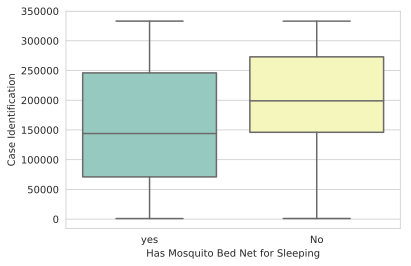

In [89]:
def plot_box(df, cols, col_x = 'Has Mosquito Bed Net for Sleeping'):
    for col in cols:
        sb.set_style("whitegrid")
        sb.boxplot(col_x, col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['Case Identification']
plot_box(df, num_cols)


 From the boxplot above, there is obvious gap in the number of people who indicated having no Mosquito Bed Net for Sleeping and those who indicated they have.

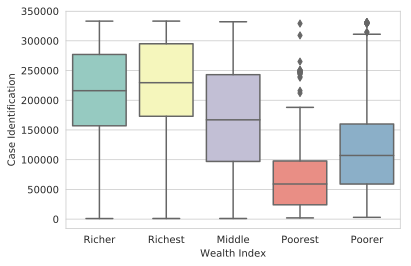

In [90]:
def plot_box(df, col, col_y = 'Case Identification'):
    sb.set_style("whitegrid")
    sb.boxplot(col, col_y, data=df)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box(df, 'Wealth Index')    


 From the box plot, the gap between Richer and Richest is not obvious. While the gap between the Middle, Poorest and Poorer is very obvious.

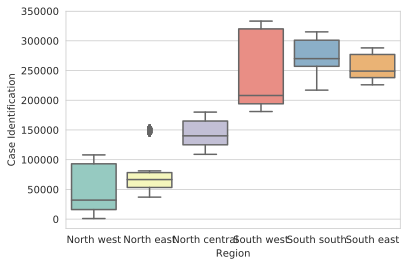

In [91]:
def plot_box(df, col, col_y = 'Case Identification'):
    sb.set_style("whitegrid")
    sb.boxplot(col, col_y, data=df)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box(df, 'Region')    


 As expected regions are distinct from each other.

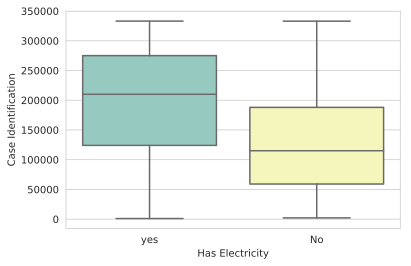

In [92]:
def plot_box(df, col, col_y = 'Case Identification'):
    sb.set_style("whitegrid")
    sb.boxplot(col, col_y, data=df)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box(df, 'Has Electricity')    


 There is obvious difference in the number of people having and not having electricity.

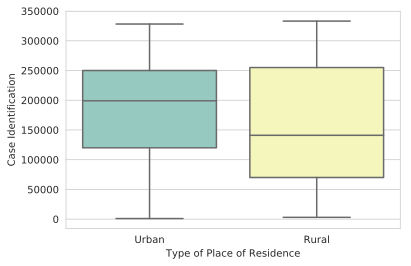

In [93]:
def plot_box(df, col, col_y = 'Case Identification'):
    sb.set_style("whitegrid")
    sb.boxplot(col, col_y, data=df)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box(df, 'Type of Place of Residence')    


 As expected type of places of residence is also obviously distinct.